# **CSAI 801 Project: COVID-19 Outcome Prediction**

# Import Common and Useful Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

# Reading the Data
The data used in this project will help to identify whether a person is going to recover from coronavirus symptoms or not based on some pre-defined standard symptoms. These symptoms are based on guidelines given by the World Health Organization (WHO).

This dataset has daily level information on the number of affected cases, deaths and recovery from 2019 novel coronavirus.

Please note that this is a time series data and so the number of cases on 
any given day is the cumulative number.

The data is available from 22 Jan, 2020. Data is in 'data.csv'.


In [2]:
# Read Data
def readData():
  df = pd.read_csv('data.csv', index_col = 'Unnamed: 0')
  return df

# Show data sample
The dataset contains 14 major variables that will be having an impact on whether someone has recovered or not, the description of each variable are as follows,
1. Country: where the person resides.
2. Location: which part in the Country.
3. Age: Classification of the age group for each person, based on WHO Age Group Standard.
4. Gender: Male or Female.
5. Visited_Wuhan: whether the person has visited Wuhan, China or not.
6. From_Wuhan: whether the person is from Wuhan, China or not.
7. Symptoms: there are six families of symptoms that are coded in six fields.
13. Time_before_symptoms_appear.
14. Result: death (1) or recovered (0).

In [3]:
data = readData()
data.head()

,location,country,gender,age,vis_wuhan,from_wuhan,symptom1,symptom2,symptom3,symptom4,symptom5,symptom6,diff_sym_hos,result
0,104,8,1,66.0,1,0,14,31,19,12,3,1,8,1
1,101,8,0,56.0,0,1,14,31,19,12,3,1,0,0
2,137,8,1,46.0,0,1,14,31,19,12,3,1,13,0
3,116,8,0,60.0,1,0,14,31,19,12,3,1,0,0
4,116,8,1,58.0,0,0,14,31,19,12,3,1,0,0


# Transformations (Bins and One hot encoding).

split location, country and age to bins.
convert location, country, age and gender to one hot encoding.

In [4]:
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, OneHotEncoder 
from IPython.display import display

def normalization(df):

  # # One Hot encoding
  # df.location = pd.cut(df.location, bins = 10, labels = np.arange(10), right = False)
  # df.country = pd.cut(df.country, bins = 10, labels = np.arange(10), right = False)
  # df.age = pd.cut(df.age, bins = 5, labels = np.arange(5), right = False)

  # label_encoder = LabelEncoder()
  # encoder = OneHotEncoder(sparse = False)

  # df.location = label_encoder.fit_transform(df.location)
  # df[['L0', 'L1', 'L2', 'L3', 'L4', 'L5', 'L6', 'L7', 'L8', 'L9']] = encoder.fit_transform(df.location.values.reshape(-1, 1))

  # df.country = label_encoder.fit_transform(df.country)
  # df[['C0', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9']] = encoder.fit_transform(df.country.values.reshape(-1, 1))

  # df.gender = label_encoder.fit_transform(df.gender)
  # df[['Male', 'Female', 'Undefined']] = encoder.fit_transform(df.gender.values.reshape(-1, 1))

  # df.age = label_encoder.fit_transform(df.age)
  # df[['a0', 'a1', 'a2', 'a3', 'a4']] = encoder.fit_transform(df.age.values.reshape(-1, 1))

  # df = df.drop('location', axis = 1)
  # df = df.drop('country', axis = 1)
  # df = df.drop('gender', axis = 1)
  # df = df.drop('age', axis = 1)

  # Min Max Scaling
  # minMaxScaler = MinMaxScaler()
  # df['symptom1'] = minMaxScaler.fit_transform(np.array(df['symptom1']).reshape(-1,1))
  # df['symptom2'] = minMaxScaler.fit_transform(np.array(df['symptom2']).reshape(-1,1))
  # df['symptom3'] = minMaxScaler.fit_transform(np.array(df['symptom3']).reshape(-1,1))
  # df['symptom4'] = minMaxScaler.fit_transform(np.array(df['symptom4']).reshape(-1,1))
  # df['symptom5'] = minMaxScaler.fit_transform(np.array(df['symptom5']).reshape(-1,1))
  # df['symptom6'] = minMaxScaler.fit_transform(np.array(df['symptom6']).reshape(-1,1))
  # df['diff_sym_hos'] = minMaxScaler.fit_transform(np.array(df['diff_sym_hos']).reshape(-1,1))


  # remove negative values
  df = df.loc[df.diff_sym_hos >= 0] 

  display(df)

  return df

# Display Features Correlation:
- between all the features (one to one).
- between the features and the target.

In [5]:
data = normalization(data)

,location,country,gender,age,vis_wuhan,from_wuhan,symptom1,symptom2,symptom3,symptom4,symptom5,symptom6,diff_sym_hos,result
0,104,8,1,66.0,1,0,14,31,19,12,3,1,8,1
1,101,8,0,56.0,0,1,14,31,19,12,3,1,0,0
2,137,8,1,46.0,0,1,14,31,19,12,3,1,13,0
3,116,8,0,60.0,1,0,14,31,19,12,3,1,0,0
4,116,8,1,58.0,0,0,14,31,19,12,3,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
858,48,3,2,24.0,0,0,14,31,19,12,3,1,0,1
859,0,0,2,35.0,0,0,14,31,19,12,3,1,0,0
860,3,1,1,49.4,0,0,14,31,19,12,3,1,0,0
861,24,9,1,49.4,0,0,14,31,19,12,3,1,0,0


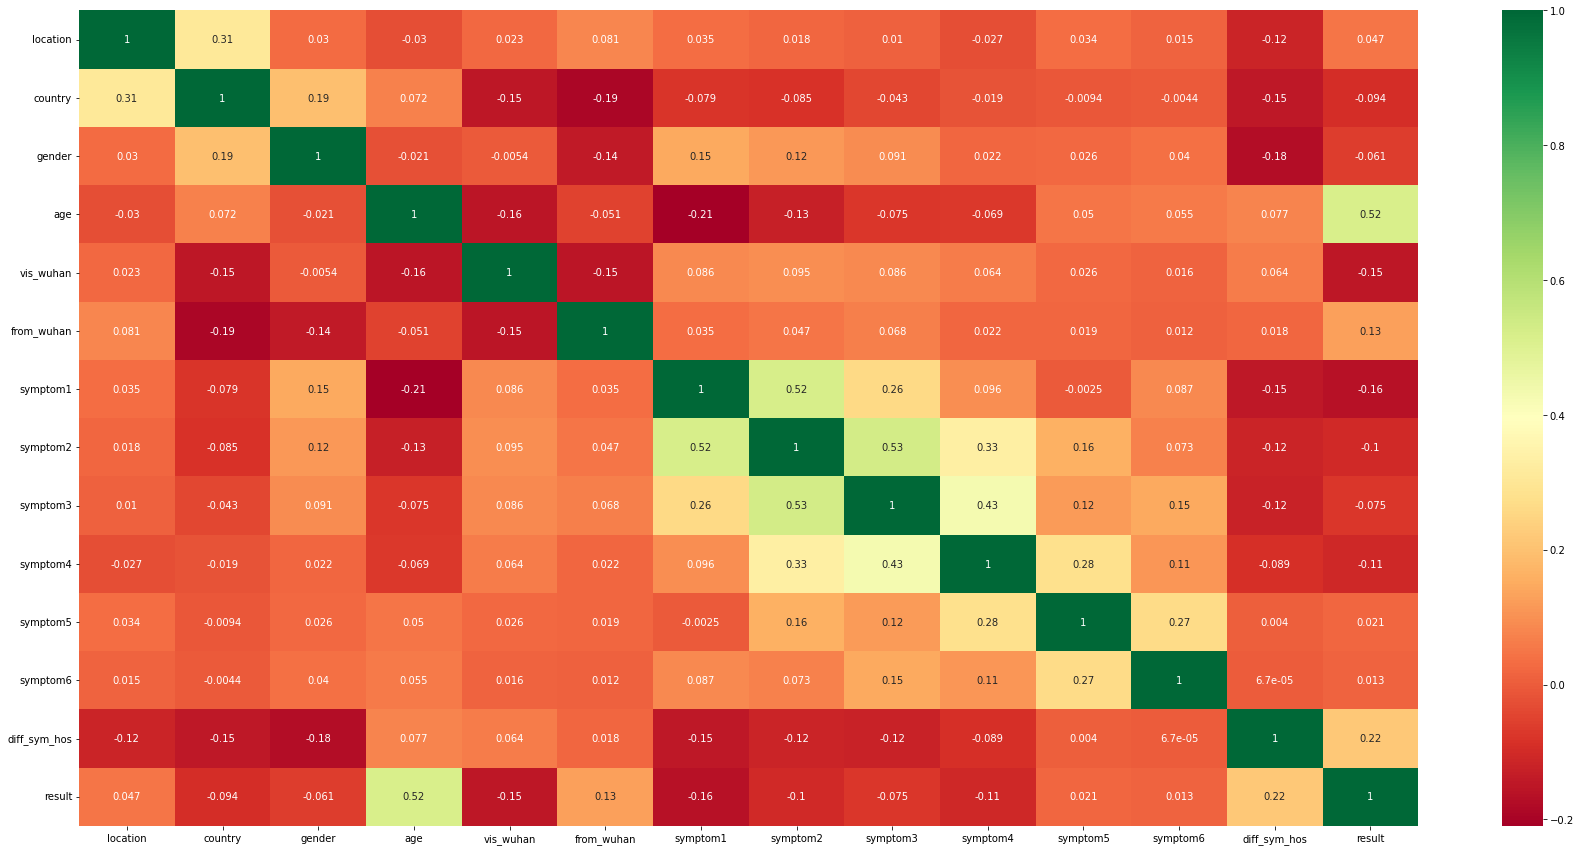

In [6]:
import seaborn as sns

plt.figure(figsize = (30, 15))
sns.heatmap(data.corr(), annot = True, cmap = 'RdYlGn')
plt.show()

# Split the data to training and testing
It is required to design different classifiers to the predict the outcome (death/recovered) when a new person is admitted to the hospital.

The data is already cleaned and preprocessed.

You will have to divide the data into three partitions: training, validation, and testing.

In [7]:
def trainTestSplit(df):
  X = df.loc[:, df.columns != 'result']
  Y = df['result']
  return X, Y

In [8]:
from sklearn.model_selection import train_test_split

X, Y = trainTestSplit(data)
X_train, X_test, y_train, y_test = train_test_split(X.values, Y.values, test_size = 0.2, stratify = Y, shuffle = True, random_state = 7)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(688, 13)
(173, 13)
(688,)
(173,)


# Starting actions: Importing models and metrics

You need to design the following classifiers:
1. K-Nearest Neighbors
2. Logistic Regression
3. Naïve Bayes 
4. Decision Trees
5. Support Vector Machines 

In [9]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB, MultinomialNB, ComplementNB, BernoulliNB, CategoricalNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

You also need to compare the performance of all classifiers using different metrics such as the precision, recall, F1-score and ROC/AUC curves.

In [10]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

from sklearn.metrics import precision_recall_curve
from sklearn.metrics import PrecisionRecallDisplay

from sklearn.metrics import classification_report

from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import RocCurveDisplay

from sklearn.metrics import f1_score

We will use grid search For each classifier to find the optimal hyperparameters.


In [11]:
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score, cross_val_predict

# Metrics Lists

In [12]:
accuracies = []
aucs = []
f1scores = []
models = []
labels = []

# Plot Functions

In [13]:
def plotCrossValidationComparison(model_scores):
  indics = range(1, model_scores.shape[1] + 1)
  ranks = ['Rank 1', 'Rank 2', 'Rank 3', 'Rank 4', 'Rank 5']
  for accuracy, index in zip(model_scores, indics):
    plt.plot(ranks, accuracy, label = f'model: {index}', marker='o', linestyle='dashed')
  plt.title('Cross Validation Comparsion')
  plt.xlabel("CV test fold")
  plt.ylabel("Model Accuracy")
  plt.legend()
  plt.show()

# Model Common Functions


*   GridSearch job.
*   Display GridSearch best Hyper-parameters.
*   Display GridSearch summary.





In [14]:
def gridSearch(model, parameters):
  kfold = 5
  scoring = 'accuracy'
  verbose = 5

  grid_search = GridSearchCV(estimator = model, param_grid = parameters, cv = kfold, scoring = scoring, verbose = verbose)
  grid_search.fit(X_train, y_train)
  results = pd.DataFrame(grid_search.cv_results_)
  best_model = grid_search.best_estimator_
  model_name = best_model.__class__.__name__
  models.append(best_model)
  labels.append(model_name)
  print()
  print('*********************************************************************')
  print()
  print(f'{model_name}')
  print()
  print('*********************************************************************')
  print()
  print('After running the grid search with cross validation we found that the best Hyper-Parameter are :')
  print()
  print(grid_search.best_params_)
  print()
  print('*********************************************************************')
  print()
  print('Grid Search Summary :')
  print()
  display(results.sort_values(by=['rank_test_score']).head())
  print()
  print('*********************************************************************')
  print()
  model_scores = results.filter(regex=r"split\d*_test_score")
  plotCrossValidationComparison(model_scores.loc[0:5].values)
  print()
  return best_model

Displaying the Classification Report to check the model performance

In [15]:
def classificationReport(model, X_test, y_test):
  y_pred = model.predict(X_test)

  # Store Metrics
  accuracy = model.score(X_test, y_test)
  f1score = f1_score(y_test, y_pred)
  accuracies.append(accuracy)
  f1scores.append(f1score)

  # Classification Report
  print(classification_report(y_test, y_pred, labels = model.classes_))

  print()

  # Precision Vs Recall curve
  precision, recall, _ = precision_recall_curve(y_test, y_pred)
  PrecisionRecallDisplay(precision = precision, recall = recall).plot()
  plt.title('Precision Vs Recall')
  plt.show()

  print()

  # ROC/AUC
  fpr, tpr, _ = roc_curve(y_test, y_pred)
  roc_auc = auc(fpr, tpr)
  aucs.append(roc_auc)
  RocCurveDisplay(fpr = fpr, tpr = tpr, roc_auc = roc_auc, estimator_name = model.__class__.__name__).plot()
  plt.title('ROC/AUC')
  plt.show()

  print()

  conf_matrix = confusion_matrix(y_test, y_pred)
  ConfusionMatrixDisplay(confusion_matrix = conf_matrix, display_labels = model.classes_).plot()
  plt.title('Confusion Matrix')
  plt.show()

# 1- Using K-Nearest Neighbors


**Grid Search**

Fitting 5 folds for each of 38 candidates, totalling 190 fits
[CV 1/5] END ................n_neighbors=1, p=1;, score=0.928 total time=   0.0s
[CV 2/5] END ................n_neighbors=1, p=1;, score=0.942 total time=   0.0s
[CV 3/5] END ................n_neighbors=1, p=1;, score=0.949 total time=   0.0s
[CV 4/5] END ................n_neighbors=1, p=1;, score=0.964 total time=   0.0s
[CV 5/5] END ................n_neighbors=1, p=1;, score=0.942 total time=   0.0s
[CV 1/5] END ................n_neighbors=1, p=2;, score=0.906 total time=   0.0s
[CV 2/5] END ................n_neighbors=1, p=2;, score=0.913 total time=   0.0s
[CV 3/5] END ................n_neighbors=1, p=2;, score=0.957 total time=   0.0s
[CV 4/5] END ................n_neighbors=1, p=2;, score=0.949 total time=   0.0s
[CV 5/5] END ................n_neighbors=1, p=2;, score=0.949 total time=   0.0s
[CV 1/5] END ................n_neighbors=2, p=1;, score=0.935 total time=   0.0s
[CV 2/5] END ................n_neighbors=2, p=1

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,param_p,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
4,0.001694,0.000649,0.007248,0.002894,3,1,"{'n_neighbors': 3, 'p': 1}",0.913043,0.963768,0.942029,0.970803,0.948905,0.947710,0.020133,1
7,0.001921,0.000391,0.005392,0.000690,4,2,"{'n_neighbors': 4, 'p': 2}",0.920290,0.949275,0.927536,0.963504,0.963504,0.944822,0.017991,2
0,0.002110,0.000344,0.006832,0.001973,1,1,"{'n_neighbors': 1, 'p': 1}",0.927536,0.942029,0.949275,0.963504,0.941606,0.944790,0.011711,3
5,0.001910,0.000146,0.006222,0.002461,3,2,"{'n_neighbors': 3, 'p': 2}",0.920290,0.963768,0.927536,0.948905,0.956204,0.943341,0.016702,4
8,0.001517,0.000350,0.005108,0.000058,5,1,"{'n_neighbors': 5, 'p': 1}",0.905797,0.956522,0.927536,0.956204,0.963504,0.941913,0.021885,5



*********************************************************************



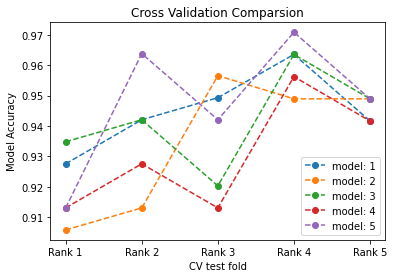

In [16]:
parameters = {'n_neighbors':list(range(1, 20)), 'p': [1, 2]}
knn = gridSearch(KNeighborsClassifier(), parameters)

Classification Report

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       151
           1       0.84      0.73      0.78        22

    accuracy                           0.95       173
   macro avg       0.90      0.85      0.88       173
weighted avg       0.95      0.95      0.95       173




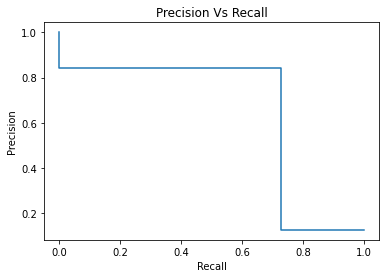

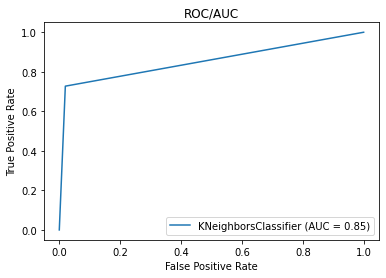

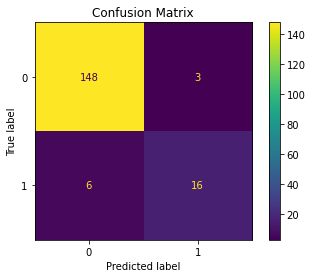

In [17]:
classificationReport(knn, X_test, y_test)

# 2- Logistic Regression

Warning The choice of the algorithm depends on the penalty chosen.

Supported penalties by solver:
- ‘lbfgs’ - [‘l2’, None]
- ‘liblinear’ - [‘l1’, ‘l2’]
- ‘newton-cg’ - [‘l2’, None]
- ‘newton-cholesky’ - [‘l2’, None]
- ‘sag’ - [‘l2’, None]
- ‘saga’ - [‘elasticnet’, ‘l1’, ‘l2’, None]

After trail and error we figure that will lead to failures in some combinations during the grid search so we will use:
- ‘liblinear’ - [‘l1’, ‘l2’].

**Grid Search**

Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV 1/5] END C=1e-05, penalty=l1, solver=liblinear;, score=0.877 total time=   0.0s
[CV 2/5] END C=1e-05, penalty=l1, solver=liblinear;, score=0.877 total time=   0.0s
[CV 3/5] END C=1e-05, penalty=l1, solver=liblinear;, score=0.870 total time=   0.0s
[CV 4/5] END C=1e-05, penalty=l1, solver=liblinear;, score=0.876 total time=   0.0s
[CV 5/5] END C=1e-05, penalty=l1, solver=liblinear;, score=0.876 total time=   0.0s
[CV 1/5] END C=1e-05, penalty=l2, solver=liblinear;, score=0.877 total time=   0.0s
[CV 2/5] END C=1e-05, penalty=l2, solver=liblinear;, score=0.877 total time=   0.0s
[CV 3/5] END C=1e-05, penalty=l2, solver=liblinear;, score=0.870 total time=   0.0s
[CV 4/5] END C=1e-05, penalty=l2, solver=liblinear;, score=0.876 total time=   0.0s
[CV 5/5] END C=1e-05, penalty=l2, solver=liblinear;, score=0.876 total time=   0.0s
[CV 1/5] END C=0.0001, penalty=l1, solver=liblinear;, score=0.877 total time=   0.0s
[CV 2/5] END C

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_penalty,param_solver,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
10,0.027089,0.003894,0.000759,0.000020,1,l1,liblinear,"{'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}",0.942029,0.956522,0.949275,0.963504,0.934307,0.949127,0.010309,1
17,0.018745,0.001833,0.003756,0.005587,1000.0,l2,liblinear,"{'C': 1000.0, 'penalty': 'l2', 'solver': 'libl...",0.942029,0.971014,0.956522,0.956204,0.919708,0.949096,0.017319,2
14,0.038972,0.010123,0.003416,0.004939,100.0,l1,liblinear,"{'C': 100.0, 'penalty': 'l1', 'solver': 'libli...",0.942029,0.971014,0.956522,0.956204,0.919708,0.949096,0.017319,2
16,0.045957,0.019861,0.004851,0.005592,1000.0,l1,liblinear,"{'C': 1000.0, 'penalty': 'l1', 'solver': 'libl...",0.942029,0.971014,0.956522,0.956204,0.919708,0.949096,0.017319,2
13,0.008845,0.004364,0.000769,0.000142,10.0,l2,liblinear,"{'C': 10.0, 'penalty': 'l2', 'solver': 'liblin...",0.942029,0.963768,0.949275,0.963504,0.919708,0.947657,0.016286,5



*********************************************************************



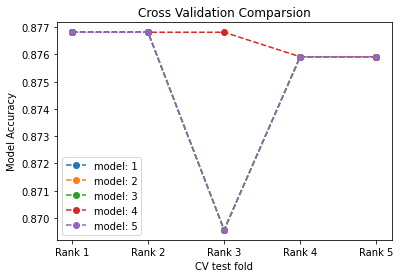

In [18]:
parameters = {'penalty':('l1', 'l2'), 
              'solver':['liblinear'], 
              'C':[1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 1e1, 1e2, 1e3]}

log_reg = gridSearch(LogisticRegression(), parameters)

Classification Report

              precision    recall  f1-score   support

           0       0.95      0.97      0.96       151
           1       0.74      0.64      0.68        22

    accuracy                           0.92       173
   macro avg       0.84      0.80      0.82       173
weighted avg       0.92      0.92      0.92       173




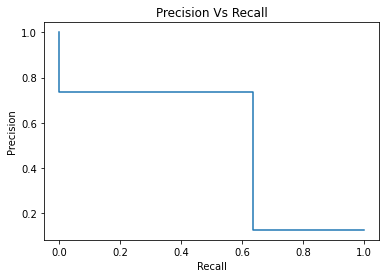

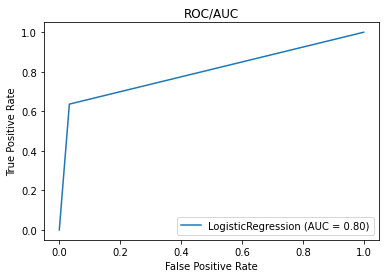

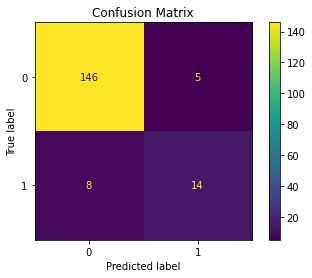

In [19]:
classificationReport(log_reg, X_test, y_test)

# 3- Naïve Bayes

We will try different Naive Bayes algrithms:
- Gaussian
- Multinomial
- Complement
- Bernoulli
- Categorical

After trail and error we figure that **Multinomial** is the most suitable for this problem.

**Grid Search**

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END ...........................alpha=1;, score=0.870 total time=   0.0s
[CV 2/5] END ...........................alpha=1;, score=0.862 total time=   0.0s
[CV 3/5] END ...........................alpha=1;, score=0.826 total time=   0.0s
[CV 4/5] END ...........................alpha=1;, score=0.854 total time=   0.0s
[CV 5/5] END ...........................alpha=1;, score=0.825 total time=   0.0s
[CV 1/5] END ...........................alpha=2;, score=0.870 total time=   0.0s
[CV 2/5] END ...........................alpha=2;, score=0.870 total time=   0.0s
[CV 3/5] END ...........................alpha=2;, score=0.826 total time=   0.0s
[CV 4/5] END ...........................alpha=2;, score=0.847 total time=   0.0s
[CV 5/5] END ...........................alpha=2;, score=0.818 total time=   0.0s
[CV 1/5] END ...........................alpha=3;, score=0.870 total time=   0.0s
[CV 2/5] END ...........................alpha=3;

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.003742,0.002818,0.000569,0.000081,1,{'alpha': 1},0.869565,0.862319,0.826087,0.854015,0.824818,0.847361,0.018557,1
1,0.001645,0.000278,0.000508,0.000066,2,{'alpha': 2},0.869565,0.869565,0.826087,0.846715,0.817518,0.845890,0.021535,2
4,0.007798,0.009572,0.000625,0.000073,5,{'alpha': 5},0.869565,0.869565,0.833333,0.832117,0.817518,0.844420,0.021272,3
6,0.001827,0.000803,0.000830,0.000689,7,{'alpha': 7},0.869565,0.869565,0.833333,0.839416,0.810219,0.844420,0.022725,3
7,0.003292,0.002926,0.000513,0.000067,8,{'alpha': 8},0.869565,0.869565,0.833333,0.839416,0.810219,0.844420,0.022725,3



*********************************************************************



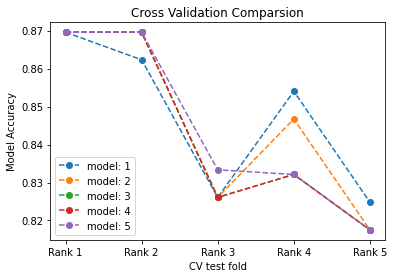

In [20]:
parameters = {'alpha': range(1, 11)}

multinominal = gridSearch(MultinomialNB(), parameters)

Classification Report

              precision    recall  f1-score   support

           0       0.93      0.91      0.92       151
           1       0.46      0.55      0.50        22

    accuracy                           0.86       173
   macro avg       0.70      0.73      0.71       173
weighted avg       0.87      0.86      0.87       173




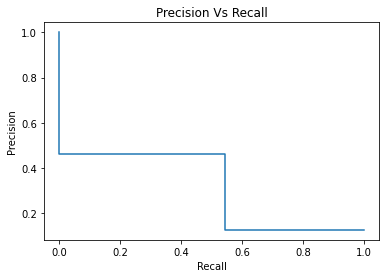

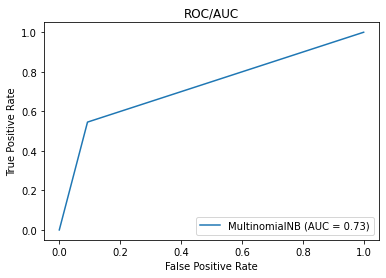

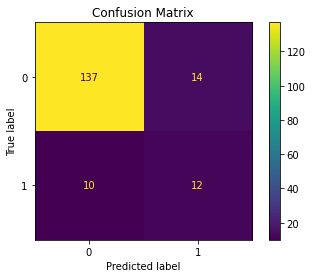

In [21]:
classificationReport(multinominal, X_test, y_test)

# 4- Decision Trees

**Grid Search**

Fitting 5 folds for each of 42 candidates, totalling 210 fits
[CV 1/5] END criterion=gini, max_depth=8, min_samples_split=5;, score=0.913 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=8, min_samples_split=5;, score=0.964 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=8, min_samples_split=5;, score=0.993 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=8, min_samples_split=5;, score=0.985 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=8, min_samples_split=5;, score=0.978 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=8, min_samples_split=10;, score=0.906 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=8, min_samples_split=10;, score=0.957 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=8, min_samples_split=10;, score=0.986 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=8, min_samples_split=10;, score=0.985 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=8, min_samples_split=10;, score=0.971 to

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
18,0.001626,0.000231,0.000577,0.000090,gini,14,5,"{'criterion': 'gini', 'max_depth': 14, 'min_sa...",0.920290,0.963768,0.992754,0.985401,0.978102,0.968063,0.025736,1
0,0.002572,0.001510,0.002332,0.003384,gini,8,5,"{'criterion': 'gini', 'max_depth': 8, 'min_sam...",0.913043,0.963768,0.992754,0.985401,0.978102,0.966614,0.028447,2
3,0.001810,0.000440,0.001953,0.002699,gini,9,5,"{'criterion': 'gini', 'max_depth': 9, 'min_sam...",0.905797,0.971014,0.992754,0.985401,0.978102,0.966614,0.031261,2
6,0.003842,0.004653,0.000550,0.000028,gini,10,5,"{'criterion': 'gini', 'max_depth': 10, 'min_sa...",0.913043,0.963768,0.992754,0.985401,0.978102,0.966614,0.028447,2
15,0.001577,0.000142,0.002401,0.003662,gini,13,5,"{'criterion': 'gini', 'max_depth': 13, 'min_sa...",0.913043,0.963768,0.992754,0.985401,0.978102,0.966614,0.028447,2



*********************************************************************



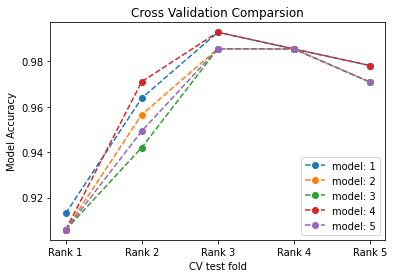

In [22]:
parameters = {'criterion':['gini', 'entropy'],
              'max_depth':range(8, 15),
              'min_samples_split':[5, 10, 20]}

d_tree = gridSearch(DecisionTreeClassifier(), parameters)

Classification Report

              precision    recall  f1-score   support

           0       0.99      0.97      0.98       151
           1       0.84      0.95      0.89        22

    accuracy                           0.97       173
   macro avg       0.92      0.96      0.94       173
weighted avg       0.97      0.97      0.97       173




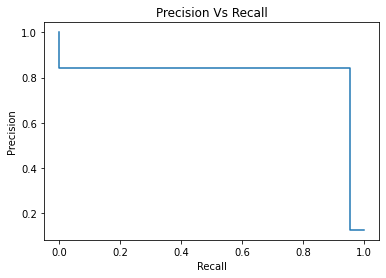

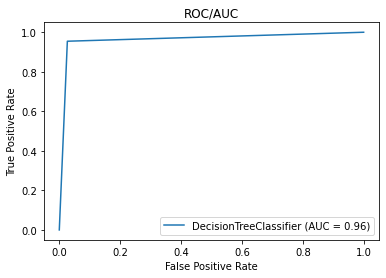

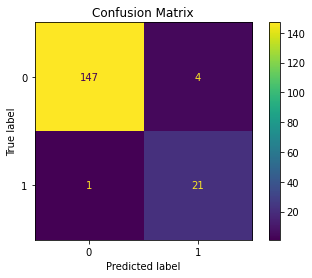

In [23]:
classificationReport(d_tree, X_test, y_test)

# 5- Support Vector Machines 

**Grid Search**

Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV 1/5] END .....C=0.001, degree=2, kernel=rbf;, score=0.877 total time=   0.0s
[CV 2/5] END .....C=0.001, degree=2, kernel=rbf;, score=0.877 total time=   0.0s
[CV 3/5] END .....C=0.001, degree=2, kernel=rbf;, score=0.870 total time=   0.0s
[CV 4/5] END .....C=0.001, degree=2, kernel=rbf;, score=0.876 total time=   0.0s
[CV 5/5] END .....C=0.001, degree=2, kernel=rbf;, score=0.876 total time=   0.0s
[CV 1/5] END ....C=0.001, degree=2, kernel=poly;, score=0.877 total time=   0.0s
[CV 2/5] END ....C=0.001, degree=2, kernel=poly;, score=0.877 total time=   0.0s
[CV 3/5] END ....C=0.001, degree=2, kernel=poly;, score=0.870 total time=   0.0s
[CV 4/5] END ....C=0.001, degree=2, kernel=poly;, score=0.876 total time=   0.0s
[CV 5/5] END ....C=0.001, degree=2, kernel=poly;, score=0.876 total time=   0.0s
[CV 1/5] END .....C=0.001, degree=3, kernel=rbf;, score=0.877 total time=   0.0s
[CV 2/5] END .....C=0.001, degree=3, kernel=rbf

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_degree,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
26,0.012254,0.001274,0.001680,0.000133,1000.0,3,rbf,"{'C': 1000.0, 'degree': 3, 'kernel': 'rbf'}",0.927536,0.971014,0.978261,0.992701,0.970803,0.968063,0.021770,1
24,0.023327,0.011061,0.001720,0.000052,1000.0,2,rbf,"{'C': 1000.0, 'degree': 2, 'kernel': 'rbf'}",0.927536,0.971014,0.978261,0.992701,0.970803,0.968063,0.021770,1
28,0.014166,0.003026,0.001950,0.000144,1000.0,4,rbf,"{'C': 1000.0, 'degree': 4, 'kernel': 'rbf'}",0.927536,0.971014,0.978261,0.992701,0.970803,0.968063,0.021770,1
29,0.266591,0.146938,0.004657,0.003809,1000.0,4,poly,"{'C': 1000.0, 'degree': 4, 'kernel': 'poly'}",0.934783,0.963768,0.971014,0.978102,0.978102,0.965154,0.016087,4
23,0.077783,0.019505,0.003982,0.004899,100.0,4,poly,"{'C': 100.0, 'degree': 4, 'kernel': 'poly'}",0.927536,0.963768,0.971014,0.978102,0.970803,0.962245,0.017937,5



*********************************************************************



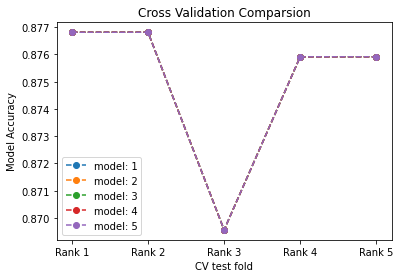

In [24]:
parameters = {'kernel':['rbf', 'poly'],
              'degree':list(range(2, 5)),
              'C':[1e-3, 1e-2, 1, 1e2, 1e3]}

svm = gridSearch(SVC(), parameters)

Classification Report

              precision    recall  f1-score   support

           0       0.96      0.96      0.96       151
           1       0.73      0.73      0.73        22

    accuracy                           0.93       173
   macro avg       0.84      0.84      0.84       173
weighted avg       0.93      0.93      0.93       173




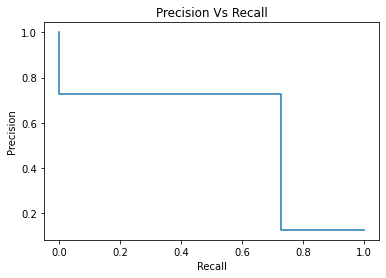

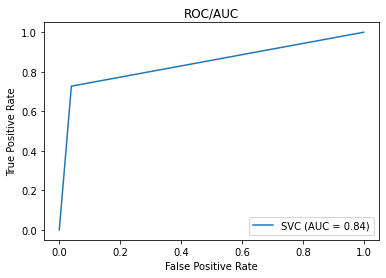

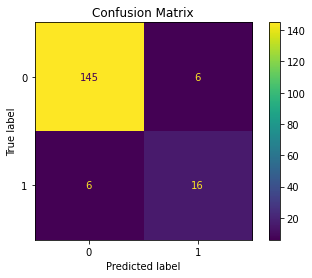

In [25]:
classificationReport(svm, X_test, y_test)

# Metrics Comparisons
- ROC/AUC
- F1 Scores
- Accuracies

In [26]:
def plotROC(model, fpr, tpr, roc_auc):
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, label = f'{model.__class__.__name__} (AUC = {np.round(roc_auc, 2)})')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')

In [27]:
def compareROC_AUC(models, X_test, y_test):
  for model in models:
    y_pred = model.predict(X_test)
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)
    plotROC(model, fpr, tpr, roc_auc)
  plt.title('ROC/AUC Comparison')
  plt.legend()
  plt.show()

In [28]:
def compareBar(data, labels, title):
  caps = []
  for label in labels:
    caps.append(''.join(c for c in label if c.isupper()))
  plt.bar(caps, data, width = 0.4)
  for index, value in enumerate(data):
    x = np.round(value, 2)
    plt.text(index - 0.15, 0.05, str(x))
  plt.title(title)
  plt.show()

Models of comparisons
[KNeighborsClassifier(n_neighbors=3, p=1), LogisticRegression(C=1, penalty='l1', solver='liblinear'), MultinomialNB(alpha=1), DecisionTreeClassifier(max_depth=14, min_samples_split=5), SVC(C=1000.0, degree=2)]



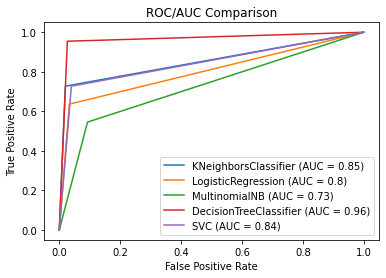

In [29]:
print(f'Models of comparisons')
print(models)
print()
compareROC_AUC(models, X_test, y_test)

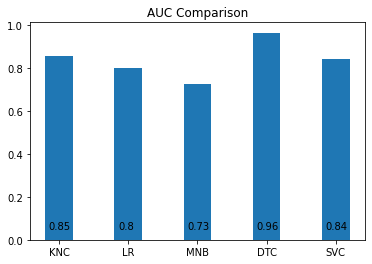

In [30]:
compareBar(aucs, labels, 'AUC Comparison')

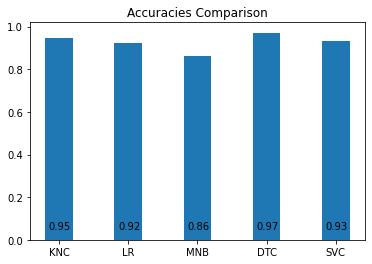

In [31]:
compareBar(accuracies, labels, 'Accuracies Comparison')

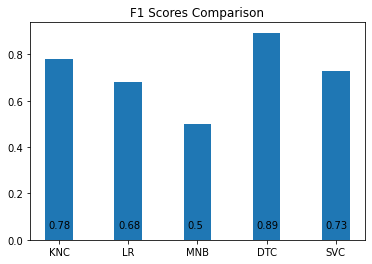

In [32]:
compareBar(f1scores, labels, 'F1 Scores Comparison')